<a href="https://colab.research.google.com/github/lucasjirwin/NYPD-Network-Analysis/blob/main/Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib 

In [ ]:
df = pd.read_csv("AB_NYC_2019.csv")

In [ ]:
new_df = pd.DataFrame(data = (df["longitude"],df["latitude"], df["price"]))

In [ ]:
new_df = new_df.transpose()


In [ ]:
from scipy import stats
new_df = new_df[np.abs(stats.zscore(new_df['price']))<2.5]
new_df

,longitude,latitude,price
0,-73.97237,40.64749,0.173256
1,-73.98377,40.75362,0.261628
2,-73.94190,40.80902,0.174419
3,-73.95976,40.68514,0.103488
4,-73.94399,40.79851,0.093023
...,...,...,...
48890,-73.94995,40.67853,0.081395
48891,-73.93317,40.70184,0.046512
48892,-73.94867,40.81475,0.133721
48893,-73.99112,40.75751,0.063953


In [ ]:
price = df["price"]

In [ ]:
price

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [ ]:
BBox = (df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())


In [ ]:
BBox

(-74.24441999999999, -73.71299, 40.499790000000004, 40.913059999999994)

In [ ]:
NYC = plt.imread('NYC Map .png')
NYC.shape


(1346, 1292, 4)

In [ ]:
new_df['price'] = new_df['price']/(np.max(new_df['price'])-np.min(new_df['price']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


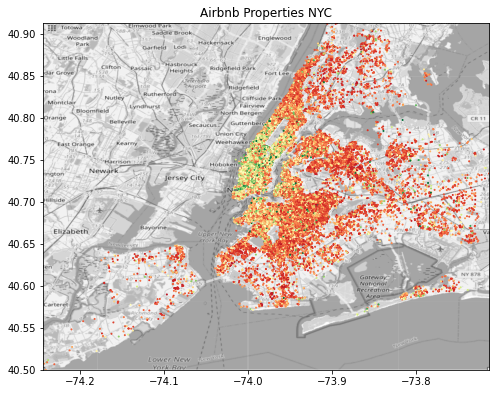

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(new_df.longitude, new_df.latitude, c= new_df.price , 
           cmap = "RdYlGn", s=1)
ax.set_title('Airbnb Properties NYC')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
NYC_pic = ax.imshow(NYC[:,:,0], zorder=0, extent = BBox, aspect = "equal", cmap ="gray")
fig.savefig("Nyc.png", dpi = 1000)